В этой jupyter-тетрадке рассмотрим кратко назначение основных пакетов для визуализации данных в Python:

- matplotlib
- seaborn
- bokeh
- networkX

Множество примеров можно найти на сайтах этих библиотек.

PS. Пакет networkX - это серьезный пакет для работы с графами, и визуализация графов является только одной из его функций. Здесь он включен, т.к. отображение графов - весьма частая задача.

## matplotlib

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (16,8)

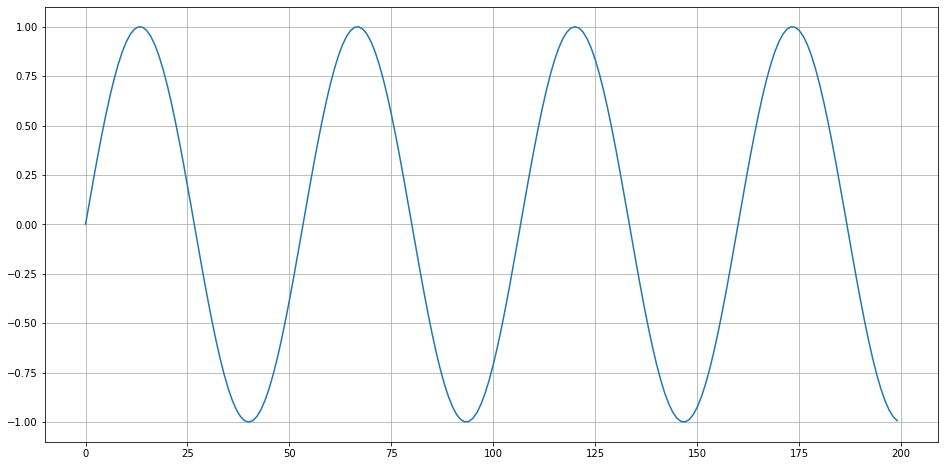

In [2]:
# пока делаем всё без numPy/sciPy/pandas

import math

fs = 8000
f = 150

signal = [math.sin(n*f*2*math.pi/fs) for n in range(200)]
plt.plot(signal)
plt.grid()

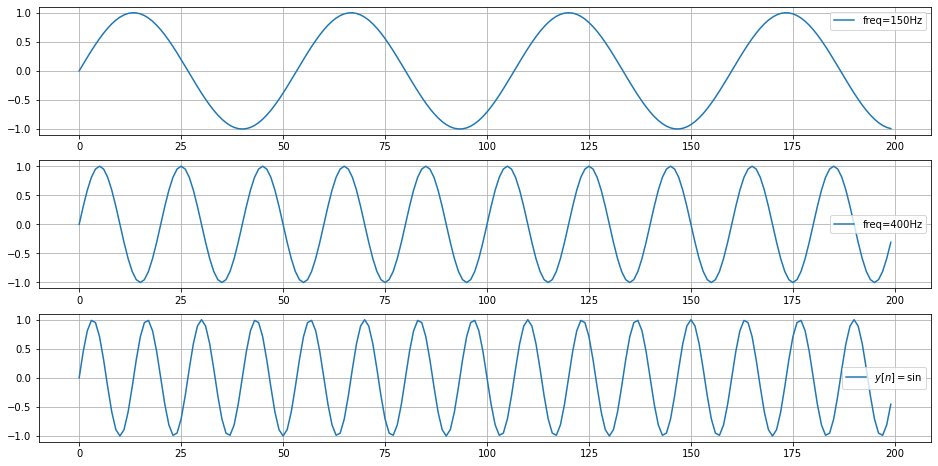

In [3]:
f2 = 400
f3 = 600

plt.subplot(3,1,1)
plt.plot(signal, label='freq=150Hz')
plt.grid()
plt.legend()

plt.subplot(3,1,2)
signal2 = [math.sin(n*f2*2*math.pi/fs) for n in range(200)]
plt.plot(signal2, label='freq=400Hz')
plt.grid()
plt.legend()

plt.subplot(3,1,3)
signal3 = [math.sin(n*f3*2*math.pi/fs) for n in range(200)]
plt.plot(signal3, label='$y[n]=\sin \frac{600 \cdot 2 \pi x}{8000}$')
plt.grid()
plt.legend()


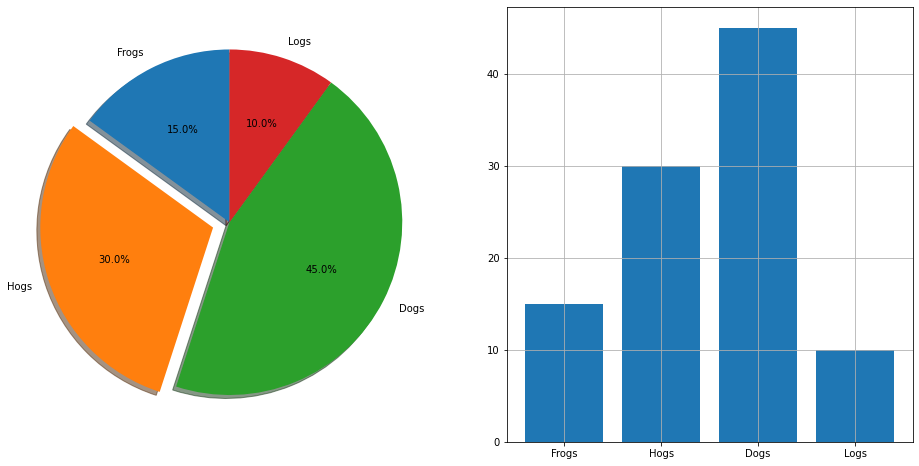

In [4]:
# Pie chart
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.subplot(121)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.subplot(122)
plt.bar(labels, sizes)
plt.grid()

## seaborn

In [5]:
import seaborn as sns

sns.set_theme(style="darkgrid")

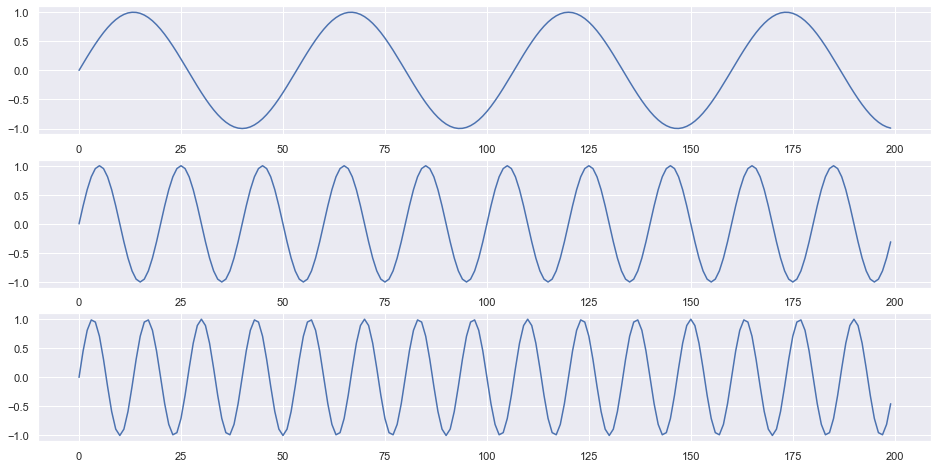

In [6]:
plt.subplot(3,1,1)
sns.lineplot(data=signal)

plt.subplot(3,1,2)
sns.lineplot(data=signal2)

plt.subplot(3,1,3)
sns.lineplot(data=signal3)


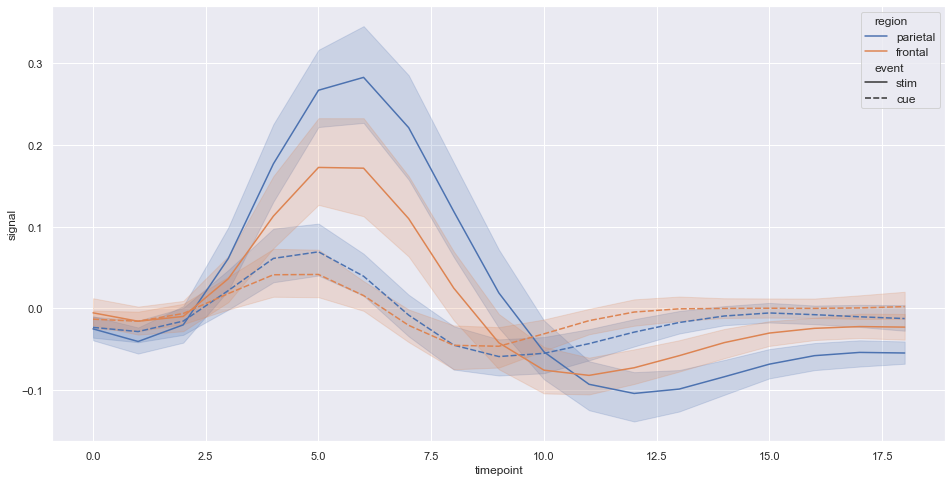

In [7]:
# Seaborn больше заточен на визуализацию статистики...

fmri = sns.load_dataset("fmri")

# полупрозрачные области соответствуют доверительным интервалам:

sns.lineplot(x="timepoint", y="signal",
             hue="region", style="event",
             data=fmri)

## Интерактивные графики Bokeh

[Больше примеров здесь](https://hub.gke2.mybinder.org/user/bokeh-bokeh-notebooks-xnxj9xdp/notebooks/tutorial/00%20-%20Introduction%20and%20Setup.ipynb)

In [8]:
from bokeh.io import output_notebook

output_notebook()


Loading BokehJS ...

In [9]:
from bokeh.plotting import figure, show

# prepare some data
x = [1, 2, 3, 4, 5]
y1 = [6, 7, 2, 4, 5]
y2 = [2, 3, 4, 5, 6]
y3 = [4, 5, 5, 7, 2]

# create a new plot with a title and axis labels
p = figure(title="Multiple line example", x_axis_label="x", y_axis_label="y")

# add multiple renderers
p.line(x, y1, legend_label="Temp.", line_color="blue", line_width=2)
p.line(x, y2, legend_label="Rate", line_color="red", line_width=2)
p.line(x, y3, legend_label="Objects", line_color="green", line_width=2)

# show the results
show(p)


In [10]:
from bokeh.models import ColumnDataSource
from bokeh.sampledata.periodic_table import elements
from bokeh.transform import dodge, factor_cmap


periods = ["I", "II", "III", "IV", "V", "VI", "VII"]
groups = [str(x) for x in range(1, 19)]

df = elements.copy()
df["atomic mass"] = df["atomic mass"].astype(str)
df["group"] = df["group"].astype(str)
df["period"] = [periods[x-1] for x in df.period]
df = df[df.group != "-"]
df = df[df.symbol != "Lr"]
df = df[df.symbol != "Lu"]

cmap = {
    "alkali metal"         : "#a6cee3",
    "alkaline earth metal" : "#1f78b4",
    "metal"                : "#d93b43",
    "halogen"              : "#999d9a",
    "metalloid"            : "#e08d49",
    "noble gas"            : "#eaeaea",
    "nonmetal"             : "#f1d4Af",
    "transition metal"     : "#599d7A",
}

source = ColumnDataSource(df)

p = figure(plot_width=900, plot_height=500, title="Periodic table (omitting LA and AC series)",
           x_range=groups, y_range=list(reversed(periods)), toolbar_location=None, tools="hover")

p.rect("group", "period", 0.95, 0.95, source=source, fill_alpha=0.6, legend_field="metal",
       color=factor_cmap('metal', palette=list(cmap.values()), factors=list(cmap.keys())))

text_props = {"source": source, "text_align": "left", "text_baseline": "middle"}

x = dodge("group", -0.4, range=p.x_range)

r = p.text(x=x, y="period", text="symbol", **text_props)
r.glyph.text_font_style="bold"

r = p.text(x=x, y=dodge("period", 0.3, range=p.y_range), text="atomic number", **text_props)
r.glyph.text_font_size="11px"

r = p.text(x=x, y=dodge("period", -0.35, range=p.y_range), text="name", **text_props)
r.glyph.text_font_size="7px"

r = p.text(x=x, y=dodge("period", -0.2, range=p.y_range), text="atomic mass", **text_props)
r.glyph.text_font_size="7px"

p.text(x=["3", "3"], y=["VI", "VII"], text=["LA", "AC"], text_align="center", text_baseline="middle")

p.hover.tooltips = [
    ("Name", "@name"),
    ("Atomic number", "@{atomic number}"),
    ("Atomic mass", "@{atomic mass}"),
    ("Type", "@metal"),
    ("CPK color", "$color[hex, swatch]:CPK"),
    ("Electronic configuration", "@{electronic configuration}"),
]

p.outline_line_color = None
p.grid.grid_line_color = None
p.axis.axis_line_color = None
p.axis.major_tick_line_color = None
p.axis.major_label_standoff = 0
p.legend.orientation = "horizontal"
p.legend.location ="top_center"

show(p)

In [11]:
import numpy as np

from bokeh.io import curdoc
from bokeh.layouts import layout, column, row
from bokeh.models import ColumnDataSource, Slider, CustomJS


N = 200
fs = 8000
f = 100

x = range(N)
y = [math.sin(i*f*2*math.pi/fs) for i in x]
source = ColumnDataSource(data=dict(x=x, y=y))


plot = figure(height=400, width=800, title="my sine wave",
              tools="crosshair,pan,reset,save,wheel_zoom",
              x_range=[0, N], y_range=[-2.5, 2.5])

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)


update_signal = CustomJS(args=dict(source=source), code="""
    var data = source.data;
    var f = cb_obj.value
    var x = data['x']
    var y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = Math.sin(i * 2 * Math.PI * f / 8000)
    }
    source.change.emit();
""")

freq = Slider(title="frequency", value=100, start=10, end=1000, step=10)
freq.js_on_change('value', update_signal)


layout = layout(
    [
        [freq],
        [plot]
    ]
)

show(layout)


Only JavaScript callbacks may be used with standalone output. For more
information on JavaScript callbacks with Bokeh, see:

[https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html](https://docs.bokeh.org/en/latest/docs/user_guide/interaction/callbacks.html)

Alternatively, to use real Python callbacks, a Bokeh server application may
be used. For more information on building and running Bokeh applications, see:

[https://docs.bokeh.org/en/latest/docs/user_guide/server.html](https://docs.bokeh.org/en/latest/docs/user_guide/server.html)


## NetworkX

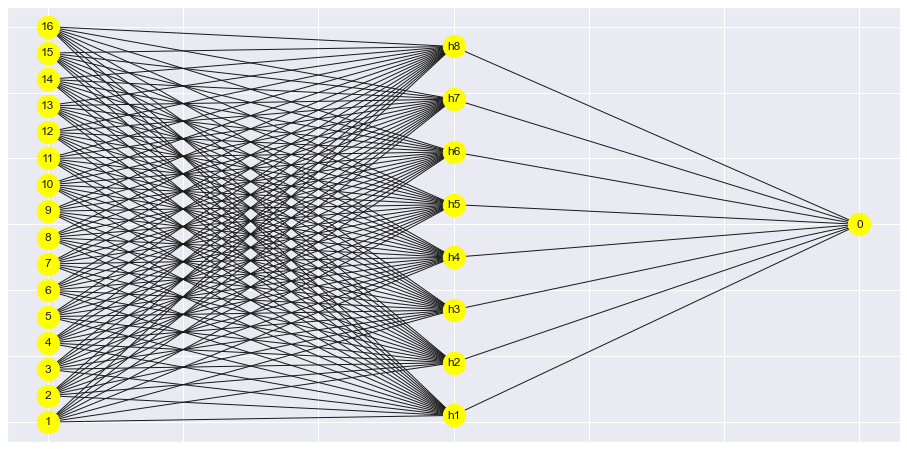

In [12]:
import networkx as nx

g = nx.Graph()

g.add_edges_from([('h' + str(i+1), '0') for i in range(8)])
g.add_edges_from([('h' + str(j+1), str(i+1)) for i in range(16) for j in range(8)])

pos = {str(i+1): [0.0, i*4] for i in range(16)}
pos.update({'h' + str(i+1): [0.3, i*8 + 1] for i in range(8)})
pos['0'] = [0.6, 30]

nx.draw_networkx_nodes(g, pos, node_size=500, node_color='yellow')
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_labels(g, pos)

plt.show()


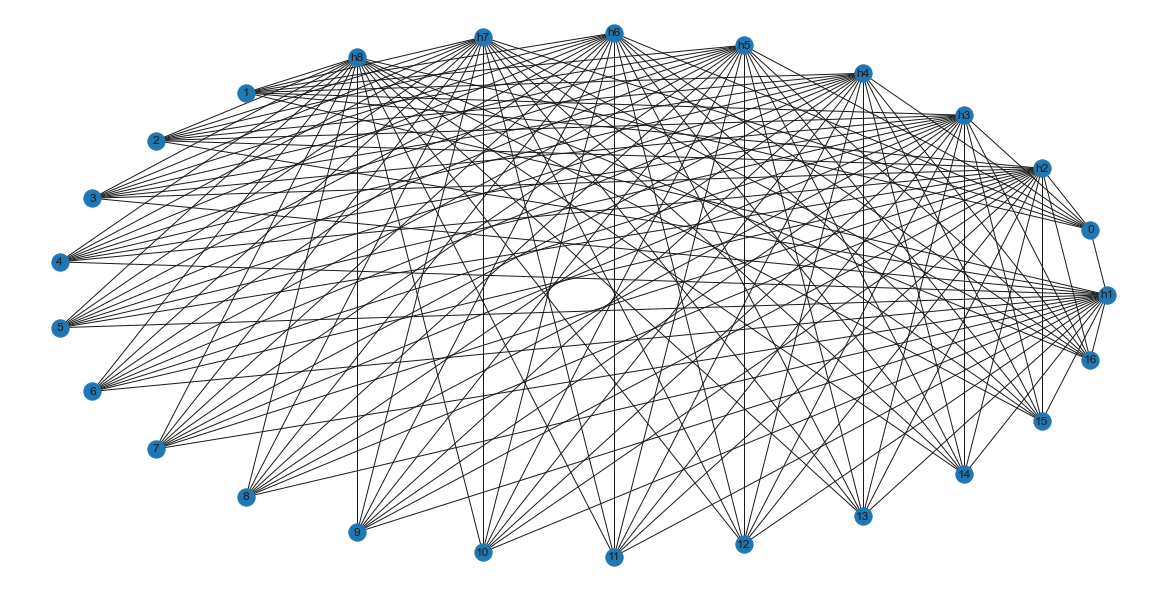

In [13]:
# drawing in circular layout
nx.draw_circular(g, with_labels=True)


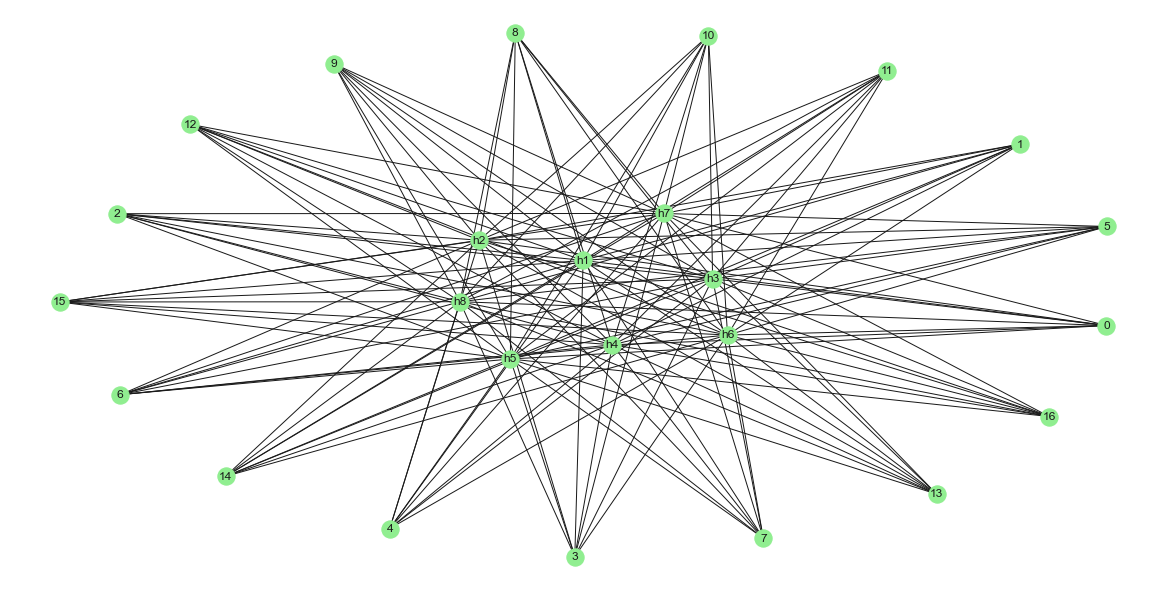

In [14]:
nx.draw_spring(g, node_color='lightgreen', with_labels=True)

In [15]:
import csv

cities = list()

with open('data/cities.csv') as f:
    reader = csv.reader(f, delimiter=';')
    for row in reader:
        cities.append(row[1:-1])

cities

[['Afghanistan', 'Kabul', '34.5166667', '69.1833344'],
 ['Afghanistan', 'Kandahar', '31.6100000', '65.6999969'],
 ['Afghanistan', 'Mazar-e Sharif', '36.7069444', '67.1122208'],
 ['Afghanistan', 'Herat', '34.3400000', '62.1899986'],
 ['Afghanistan', 'Jalalabad', '34.4200000', '70.4499969'],
 ['Afghanistan', 'Konduz', '36.7200000', '68.8600006'],
 ['Afghanistan', 'Ghazni', '33.5535554', '68.4268875'],
 ['Afghanistan', 'Balkh', '36.7586111', '66.8961105'],
 ['Afghanistan', 'Baghlan', '36.1200000', '68.6999969'],
 ['Afghanistan', 'Gardez', '33.5900000', '69.2200012'],
 ['Afghanistan', 'Khost', '33.3380556', '69.9202805'],
 ['Afghanistan', 'Khanabad', '36.6800000', '69.1100006'],
 ['Afghanistan', 'Tashqorghan', '36.6952778', '67.6980591'],
 ['Afghanistan', 'Taloqan', '36.7360511', '69.5345078'],
 ['Afghanistan', 'Cool urhajo', '34.2654452', '67.3451614'],
 ['Afghanistan', 'Pol-e Khomri', '35.9425000', '68.7191696'],
 ['Afghanistan', 'Sheberghan', '36.6672222', '65.7536087'],
 ['Afghanistan'

In [16]:
countries = list(set([c[0] for c in cities]))
countries

['Venezuela',
 'Somalia',
 'Finland',
 'Sweden',
 'Chile',
 'Uganda',
 'Austria',
 'El Salvador',
 'Kiribati',
 'Tunisia',
 'Pakistan',
 'Sudan',
 'Cape Verde',
 'Mauritania',
 'Macedonia',
 'Croatia',
 'Comoros',
 'Kenya',
 'Luxembourg',
 'China',
 'Seychelles',
 'Tonga',
 'Liechtenstein',
 'Equatorial Guinea',
 'Algeria',
 'Djibouti',
 'Maldives',
 'Solomon Islands',
 'Sri Lanka',
 'Niger',
 'Central African Republic',
 'Belize',
 'Greece',
 'Zimbabwe',
 'Indonesia',
 'Qatar',
 'Poland',
 'Eritrea',
 'Lebanon',
 'Oman',
 'Philippines',
 'Costa Rica',
 'Fiji',
 'Tuvalu',
 'Ukraine',
 'Ghana',
 'Afghanistan',
 'Honduras',
 'Bulgaria',
 'Armenia',
 'Samoa',
 'Latvia',
 'New Zealand',
 'Azerbaijan',
 'Iran',
 'Angola',
 'Tajikistan',
 'Georgia',
 'Cuba',
 'Jamaica',
 'Germany',
 'India',
 'Benin',
 'Gambia, The',
 'Panama',
 'Uruguay',
 'Mali',
 'Iraq',
 'Iceland',
 'Thailand',
 'United Kingdom',
 'Senegal',
 'Malaysia',
 'Jordan',
 'Italy',
 'Vietnam',
 'Switzerland',
 'Japan',
 'Libya'

In [44]:
country = 'Czech Republic'

country_cities = [c[1:] for c in cities if c[0] == country]
country_cities


[['Praha', '50.0878368', '14.4241323'],
 ['Brno', '49.1952227', '16.6079597'],
 ['Ostrava', '49.8346452', '18.2820435'],
 ['Plzen', '49.7474748', '13.3775873'],
 ['Olomouc', '49.5955243', '17.2517529'],
 ['Liberec', '50.7671119', '15.0561914'],
 ['Ceske Budejovice', '48.9744684', '14.4743404'],
 ['Hradec Kralove', '50.2092284', '15.8327684'],
 ['Usti nad Labem', '50.6607038', '14.0322723'],
 ['Pardubice', '50.0407508', '15.7765903'],
 ['Havirov', '49.7798448', '18.4368801'],
 ['Zlin', '49.2166667', '17.6666660'],
 ['Kladno', '50.1473356', '14.1028509'],
 ['Most', '50.5030069', '13.6361742'],
 ['Karvina', '49.8540031', '18.5416889'],
 ['Frydek-Mistek', '49.6853662', '18.3483772'],
 ['Opava', '49.9386635', '17.9025707'],
 ['Frydek-Mistek', '49.6833333', '18.3500004'],
 ['Decin', '50.7821525', '14.2147818'],
 ['Karlovy Vary', '50.2327126', '12.8711700'],
 ['Teplice', '50.6403975', '13.8245077'],
 ['Chomutov', '50.4604754', '13.4177856'],
 ['Jihlava', '49.3961001', '15.5912447'],
 ['Proste

{'Praha': Text(14.4241323, 50.0878368, 'Praha'),
 'Plzen': Text(13.3775873, 49.7474748, 'Plzen'),
 'Ceske Budejovice': Text(14.4743404, 48.9744684, 'Ceske Budejovice'),
 'Pardubice': Text(15.7765903, 50.0407508, 'Pardubice'),
 'Usti nad Labem': Text(14.0322723, 50.6607038, 'Usti nad Labem'),
 'Liberec': Text(15.0561914, 50.7671119, 'Liberec'),
 'Hradec Kralove': Text(15.8327684, 50.2092284, 'Hradec Kralove'),
 'Ostrava': Text(18.2820435, 49.8346452, 'Ostrava'),
 'Olomouc': Text(17.2517529, 49.5955243, 'Olomouc'),
 'Brno': Text(16.6079597, 49.1952227, 'Brno')}

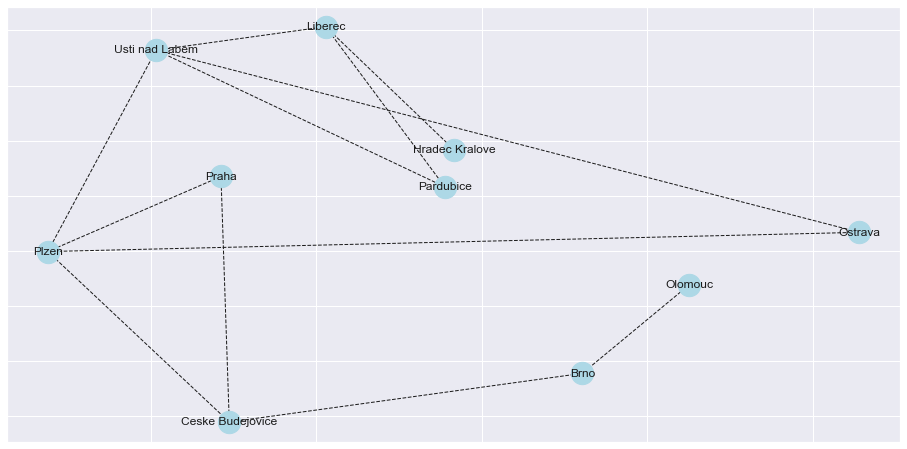

In [47]:
import itertools
import random

selected_cities = [[c[0], float(c[2]), float(c[1])] for c in country_cities[:10]]

cg = nx.Graph()

edges = list(itertools.product(selected_cities, selected_cities))
edges = [[e[0][0], e[1][0]] for e in edges if e[0][0] != e[1][0]]
edges = random.sample(edges, 12)

cg.add_edges_from(edges)
cg.add_nodes_from([c[0] for c in selected_cities])

pos = {c[0]: [c[1], c[2]] for c in selected_cities}

nx.draw_networkx_nodes(cg, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(cg, pos, style='--')
nx.draw_networkx_labels(cg, pos)


In [48]:
# добавим еще "перчинки" - реальные карты folium:

import folium

lat = sum((c[2] for c in selected_cities)) / len(selected_cities)
lon = sum((c[1] for c in selected_cities)) / len(selected_cities)

m = folium.Map(location=[lat, lon], zoom_start=7)

for p in pos:
    folium.Marker([str(pos[p][1]), str(pos[p][0])], popup=p).add_to(m)

#folium.PolyLine(, color="red", weight=2.5, opacity=1).add_to(my_map)

m